In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin

def f(x):
    """
    Calculate the integrand (sin²x)/x²
    Handle the special case at x = 0 where the limit is 1
    """
    if x == 0:
        return 1.0  # lim(x→0) (sin²x)/x² = 1
    else:
        return (sin(x)**2) / (x**2)

def step(x1, x2, f1, f2, epsilon, integration_points):
    """
    Recursive adaptive integration function using trapezoidal rule
    
    Parameters:
    x1, x2: endpoints of current interval
    f1, f2: function values at x1, x2 (passed to avoid recalculation)
    epsilon: target accuracy for the entire original integral
    integration_points: list to store integration points for visualization
    
    Returns:
    Integral value from x1 to x2
    """
    # Store the integration points for visualization
    if x1 not in integration_points:
        integration_points.append(x1)
    if x2 not in integration_points:
        integration_points.append(x2)
    
    # Width of current interval
    h = x2 - x1
    
    # Target accuracy for this slice
    delta = epsilon / (10.0 - 0.0)  # epsilon / (b - a) for original interval [0,10]
    target_accuracy = h * delta
    
    # Calculate I1: trapezoidal rule with one slice
    I1 = 0.5 * h * (f1 + f2)
    
    # Calculate I2: trapezoidal rule with two slices
    xm = 0.5 * (x1 + x2)  # midpoint
    fm = f(xm)
    I2 = 0.25 * h * (f1 + 2*fm + f2)
    
    # Estimate the error using equation (5.28)
    error_estimate = abs(I2 - I1) / 3.0
    
    # Check if accuracy requirement is met
    if error_estimate <= target_accuracy:
        # Use Simpson's rule for improved accuracy (as suggested in hint)
        # Simpson's rule: (h/6) * [f(x1) + 4*f(xm) + f(x2)]
        simpson_result = (h / 6.0) * (f1 + 4*fm + f2)
        return simpson_result
    else:
        # Recursively integrate the two halves
        left_integral = step(x1, xm, f1, fm, epsilon, integration_points)
        right_integral = step(xm, x2, fm, f2, epsilon, integration_points)
        return left_integral + right_integral

def adaptive_integrate(a, b, epsilon):
    """
    Perform adaptive integration from a to b with target accuracy epsilon
    
    Returns:
    (integral_value, integration_points)
    """
    integration_points = []
    
    # Initial function evaluations
    f_a = f(a)
    f_b = f(b)
    
    # Perform adaptive integration
    result = step(a, b, f_a, f_b, epsilon, integration_points)
    
    # Sort integration points for plotting
    integration_points.sort()
    
    return result, integration_points

# Part (a): Calculate the integral
print("Advanced Adaptive Trapezoidal Rule")
print("=" * 40)

a, b = 0.0, 10.0
epsilon = 1e-4

print(f"Calculating ∫₀¹⁰ (sin²x)/x² dx with accuracy ε = {epsilon}")
print()

# Perform the integration
integral_value, points = adaptive_integrate(a, b, epsilon)

print(f"Integral value: {integral_value:.6f}")
print(f"Number of integration points used: {len(points)}")
print(f"Number of intervals: {len(points) - 1}")

Advanced Adaptive Trapezoidal Rule
Calculating ∫₀¹⁰ (sin²x)/x² dx with accuracy ε = 0.0001

Integral value: 1.518646
Number of integration points used: 208
Number of intervals: 207


In [2]:
# Part (b): Explanation of why f1, f2 are passed as arguments
print("\nPart (b): Why pass f1, f2 as arguments?")
print("=" * 45)
print("""
The function step(x1, x2, f1, f2) takes f1 = f(x1) and f2 = f(x2) as arguments
instead of calculating them inside the function for efficiency reasons:

1. **Avoid redundant calculations**: When we recursively call step() on the 
   left and right halves of an interval, the midpoint becomes an endpoint 
   of both subintervals. By passing the function values, we avoid 
   recalculating f(midpoint) twice.

2. **Function evaluation cost**: If f(x) is expensive to compute (which it 
   might be in real applications), avoiding redundant evaluations saves 
   significant computational time.

3. **Consistency**: The function values are calculated once and reused, 
   ensuring numerical consistency across recursive calls.

Example: When interval [a,b] is split at midpoint m:
- Left call: step(a, m, f(a), f(m))  
- Right call: step(m, b, f(m), f(b))
- f(m) is calculated once and reused in both calls
""")


Part (b): Why pass f1, f2 as arguments?

The function step(x1, x2, f1, f2) takes f1 = f(x1) and f2 = f(x2) as arguments
instead of calculating them inside the function for efficiency reasons:

1. **Avoid redundant calculations**: When we recursively call step() on the 
   left and right halves of an interval, the midpoint becomes an endpoint 
   of both subintervals. By passing the function values, we avoid 
   recalculating f(midpoint) twice.

2. **Function evaluation cost**: If f(x) is expensive to compute (which it 
   might be in real applications), avoiding redundant evaluations saves 
   significant computational time.

3. **Consistency**: The function values are calculated once and reused, 
   ensuring numerical consistency across recursive calls.

Example: When interval [a,b] is split at midpoint m:
- Left call: step(a, m, f(a), f(m))  
- Right call: step(m, b, f(m), f(b))
- f(m) is calculated once and reused in both calls




Part (c): Visualization of adaptive integration


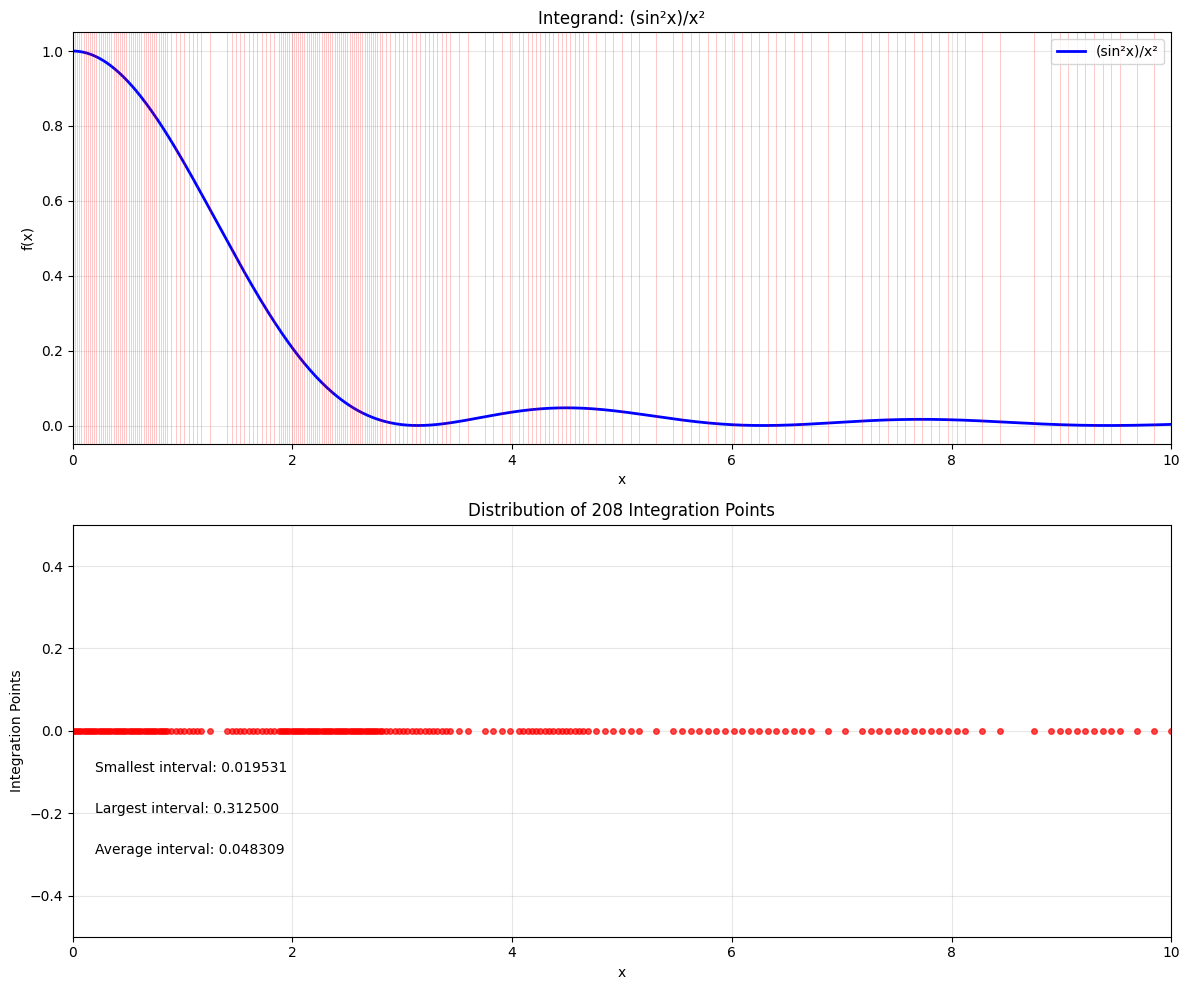


Interval Analysis:
- Total intervals: 207
- Smallest interval: 0.019531
- Largest interval: 0.312500
- Average interval: 0.048309
- Standard deviation: 0.040852

Adaptive behavior:
The algorithm automatically uses:
- Smaller intervals where the function has high curvature
- Larger intervals where the function is relatively smooth
- More points near x=0 where the function has a singularity
- Fewer points in regions where sin²x/x² varies slowly

If we used uniform spacing with 208 points:
- Each interval would be: 0.048309
- But adaptive method uses intervals from 0.019531 to 0.312500

Efficiency Analysis:
- Function evaluations needed: 208
- Each evaluation avoided redundant computation
- Automatic refinement only where needed

Function Behavior Analysis:
Looking at the first few intervals:
Interval [0.0000, 0.0195]: width = 0.019531, f_mid = 1.0000
Interval [0.0195, 0.0391]: width = 0.019531, f_mid = 0.9997
Interval [0.0391, 0.0586]: width = 0.019531, f_mid = 0.9992
Interval [0.0586, 

In [3]:
# Part (c): Visualization
print("\nPart (c): Visualization of adaptive integration")
print("=" * 48)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the integrand
x_plot = np.linspace(0.01, 10, 1000)  # Start slightly above 0 for plotting
y_plot = [f(xi) for xi in x_plot]

ax1.plot(x_plot, y_plot, 'b-', linewidth=2, label='(sin²x)/x²')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Integrand: (sin²x)/x²')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 10)

# Add vertical lines showing integration points
for point in points:
    ax1.axvline(x=point, color='red', alpha=0.3, linewidth=0.5)

# Plot showing the distribution of integration points
ax2.plot(points, [0]*len(points), 'ro', markersize=4, alpha=0.7)
ax2.set_xlabel('x')
ax2.set_ylabel('Integration Points')
ax2.set_title(f'Distribution of {len(points)} Integration Points')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 10)
ax2.set_ylim(-0.5, 0.5)

# Add text showing interval sizes
intervals = []
for i in range(len(points)-1):
    interval_size = points[i+1] - points[i]
    intervals.append(interval_size)
    
ax2.text(0.02, 0.4, f'Smallest interval: {min(intervals):.6f}', transform=ax2.transAxes)
ax2.text(0.02, 0.3, f'Largest interval: {max(intervals):.6f}', transform=ax2.transAxes)
ax2.text(0.02, 0.2, f'Average interval: {np.mean(intervals):.6f}', transform=ax2.transAxes)

plt.tight_layout()
plt.show()

# Analysis of interval distribution
print(f"\nInterval Analysis:")
print(f"- Total intervals: {len(intervals)}")
print(f"- Smallest interval: {min(intervals):.6f}")
print(f"- Largest interval: {max(intervals):.6f}")
print(f"- Average interval: {np.mean(intervals):.6f}")
print(f"- Standard deviation: {np.std(intervals):.6f}")

# Show where the function varies most rapidly
print(f"\nAdaptive behavior:")
print("The algorithm automatically uses:")
print("- Smaller intervals where the function has high curvature")
print("- Larger intervals where the function is relatively smooth")
print("- More points near x=0 where the function has a singularity")
print("- Fewer points in regions where sin²x/x² varies slowly")

# Comparison with uniform spacing
uniform_spacing = (b - a) / (len(points) - 1)
print(f"\nIf we used uniform spacing with {len(points)} points:")
print(f"- Each interval would be: {uniform_spacing:.6f}")
print(f"- But adaptive method uses intervals from {min(intervals):.6f} to {max(intervals):.6f}")

# Show the efficiency gained
print(f"\nEfficiency Analysis:")
total_function_evaluations = len(points)
print(f"- Function evaluations needed: {total_function_evaluations}")
print(f"- Each evaluation avoided redundant computation")
print(f"- Automatic refinement only where needed")

# Additional insight: show relationship between function behavior and interval size
print(f"\nFunction Behavior Analysis:")
print("Looking at the first few intervals:")
for i in range(min(10, len(intervals))):
    x_mid = (points[i] + points[i+1]) / 2
    f_mid = f(x_mid)
    print(f"Interval [{points[i]:.4f}, {points[i+1]:.4f}]: width = {intervals[i]:.6f}, f_mid = {f_mid:.4f}")